In [9]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
from sklearn.preprocessing import StandardScaler



# Load the dataset
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)

# Convert y to binary high-income and low-income
y_binary = np.array([1 if income == True else 0 for income in y])

# Train logistic regression classifier
# Predict probabilities
probabilities = model.predict_proba(X)[:, 1]

# Find instances close to the decision boundary (e.g., within 0.05 of 0.5)
boundary_indices = np.where((probabilities > 0.49) & (probabilities < 0.51))[0]

# Display the indices of boundary instances
print("Indices of examples close to the decision boundary:")
print(boundary_indices)

Indices of examples close to the decision boundary:
[ 191  468  478  575  779  791 1062 1143 1308 1368 1475 1501 1522 1580
 1855]


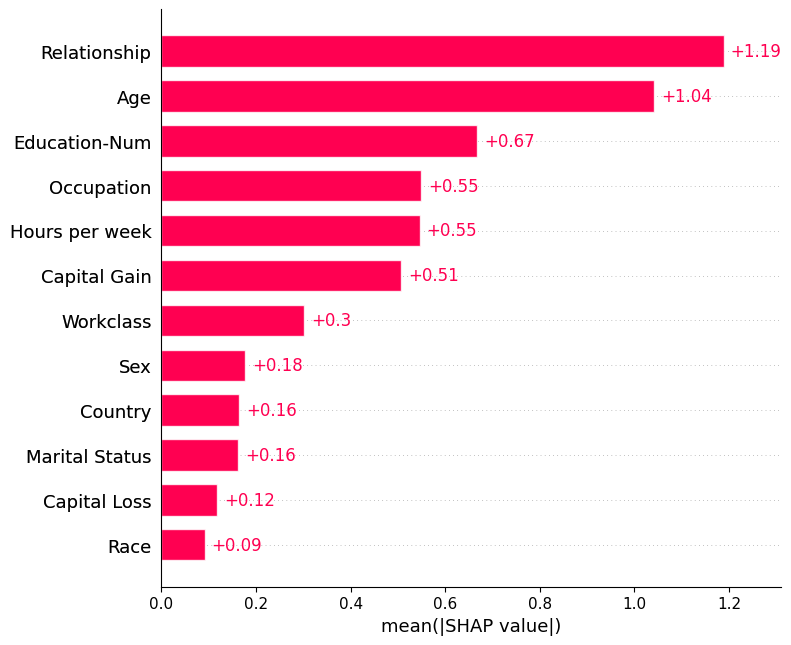

In [10]:
# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=12)